### Import relevant packages

In [2]:
import pandas as pd
from IPython.display import display, HTML

import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# for plotting purposes
%matplotlib inline

### Import custom functions

In [3]:
import loop11_functions as beta
%run loop11_functions.py

### Import cleaned data - Note: To get cleaned data, run clean before this point


In [4]:
clean_df = pd.read_csv('ttlp_test_clean.csv')
clean_df

,Unnamed: 0,Participant No.,CustomID,IP Address,Date Started,Date Completed,User Agent,Total Time Spent,Avg Time Taken,Avg Page Views,...,How satisfied did you feel using this website?,I trust the information on the website.,I would use this section of the ato.gov.au website in the future.,I found it easy to find the information I was looking for.,The content and language was easy to understand.,Give us your feedback on how we can improve the tax time lodgment pages.,* Are you an ATO employee?,* Which of the following best describes you?,"Other, please specify (2)",Which age group do you belong to?
0,3,Participant 6,NaN,119.225.114.60,10/05/17 15:39,10/05/17 15:43,Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-G9...,204,31.7,2.3,...,Very satisfied,Strongly agree,Strongly agree,Strongly agree,Strongly agree,NaN,Yes,Individual,NaN,26-45
1,4,Participant 15,NaN,121.127.217.158,10/05/17 15:41,10/05/17 15:48,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,442,51.3,2.3,...,Neither satisfied nor dissatisfied,Neither agree nor disagree,Neither agree nor disagree,Disagree,Neither agree nor disagree,the lodge online with mytax makes it confusing...,No,Tax agent,NaN,26-45
2,5,Participant 20,NaN,180.149.192.135,10/05/17 15:42,10/05/17 15:48,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,334,55.0,2.3,...,Neither satisfied nor dissatisfied,Agree,Neither agree nor disagree,Agree,Agree,NaN,Yes,Individual,NaN,26-45
3,6,Participant 24,NaN,14.203.115.50,10/05/17 15:43,10/05/17 15:53,Mozilla/5.0 (Windows NT 6.3; WOW64; rv:53.0) G...,574,142.0,1.3,...,Neither satisfied nor dissatisfied,Neither agree nor disagree,Agree,Disagree,Neither agree nor disagree,NaN,No,Individual,NaN,26-45
4,7,Participant 26,NaN,180.149.192.135,10/05/17 15:44,10/05/17 15:56,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,710,38.3,1.0,...,Dissatisfied,Neither agree nor disagree,Agree,Disagree,Agree,NaN,Yes,Individual,NaN,26-45
5,8,Participant 30,NaN,180.149.192.135,10/05/17 15:46,10/05/17 15:57,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,679,50.3,2.3,...,Satisfied,Agree,Agree,Neither agree nor disagree,Agree,NaN,Yes,Individual,NaN,26-45
6,9,Participant 31,NaN,180.149.192.133,10/05/17 15:46,10/05/17 16:12,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,1576,473.7,2.7,...,Satisfied,Agree,Agree,Agree,Agree,NaN,Yes,Individual,NaN,46-65
7,10,Participant 35,NaN,220.101.113.10,10/05/17 15:48,10/05/17 15:55,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,366,38.0,1.7,...,Very dissatisfied,Strongly agree,Strongly agree,Agree,Neither agree nor disagree,Speed up prefill,No,Individual,NaN,26-45
8,11,Participant 36,NaN,175.45.100.234,10/05/17 15:48,10/05/17 15:55,Mozilla/5.0 (Linux; Android 7.1.2; Pixel XL Bu...,372,37.7,1.0,...,Neither satisfied nor dissatisfied,Agree,Strongly agree,Strongly agree,Strongly agree,NaN,No,Individual,NaN,26-45
9,12,Participant 37,NaN,119.225.114.61,10/05/17 15:50,10/05/17 15:54,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,218,31.3,2.7,...,Dissatisfied,Agree,Agree,Disagree,Neither agree nor disagree,too much text,Yes,Individual,NaN,46-65


In [5]:
# Define sample size for future use in the script as a variable called N
N = len(clean_df)
N

183

In [6]:
# Delare variable to store folder file location
folder = "Graphs/demographic_graphs/"

In [7]:
# For reference later when picking out data in specific column
cols = list(clean_df.columns.values) 
cols

['Unnamed: 0',
 'Participant No.',
 'CustomID',
 'IP Address',
 'Date Started',
 'Date Completed',
 'User Agent',
 'Total Time Spent',
 'Avg Time Taken',
 'Avg Page Views',
 ' Task panel instructions',
 'Page Views',
 'Time Spent',
 'Task 1: Choosing a lodgment method',
 'Task 1: Choosing a lodgment method - Page Views',
 'Task 1: Choosing a lodgment method - Time Spent',
 'Task 2: Finding info on next steps',
 'Task 2: Finding info on next steps - Page Views',
 'Task 2: Finding info on next steps - Time Spent',
 '* "I found it easy to find the right lodgment method."',
 '* "I feel confident acting on the information on the website."',
 '* "I found the content easy to read and understand."',
 '* Which lodgment method did you choose?',
 'Other, please specify',
 '* What were your reasons for choosing that lodgment method?',
 'Is there anything you would improve on this design?',
 '* "Based on the information I found I would know what to do to submit my tax return."',
 'Based on this tas

## Tasks and Questions

### Breakdown results for ATO versus non-ATO

### Task 1: Choosing a lodgment method

#### Completion rate breakdown

In [8]:
# Create resutls for ATO versus non-ATO per task
def breakdown_task_rates(df, task, breakdown, col_names, title, labels, location):
    
    groups = df[breakdown].unique()
    print(groups)
    results = []
    
    results.append(pd.DataFrame(df[task].groupby(df[breakdown]).value_counts()))
    results.append(pd.DataFrame(df[task].groupby(df[breakdown]).value_counts(normalize=True)))
    results = pd.concat(results, axis=1)
    results.index.names = col_names
    results.columns = [task+' (N)', task+' (%)']
    results = results.sort_index(ascending=False)
    
    # print
    display(results)
    
    # Calculate 95% CIfor each task results per group
    # CI = p_hat +- 1.96 * (sqrt((p_hat*(1-p_hat))/n))
    cis=[]
    for i in groups:
        n = results[task + ' (N)'][i].sum()
        p_hat = (results[task + ' (N)'][i,'success'])/n
        cis.append(1.96 * (np.sqrt((p_hat * (1-p_hat))/n)))
    
    grapher_stacked(results, task+' (%)', title, labels, cis, location)

['Yes' 'No']


Task 1: Choosing a lodgment method (N)  \
ATO Employee Test Result                                           
Yes          success                                          64   
             fail                                             38   
No           success                                          52   
             fail                                             26   
             abandon                                           3   

                          Task 1: Choosing a lodgment method (%)  
ATO Employee Test Result                                          
Yes          success                                    0.627451  
             fail                                       0.372549  
No           success                                    0.641975  
             fail                                       0.320988  
             abandon                                    0.037037

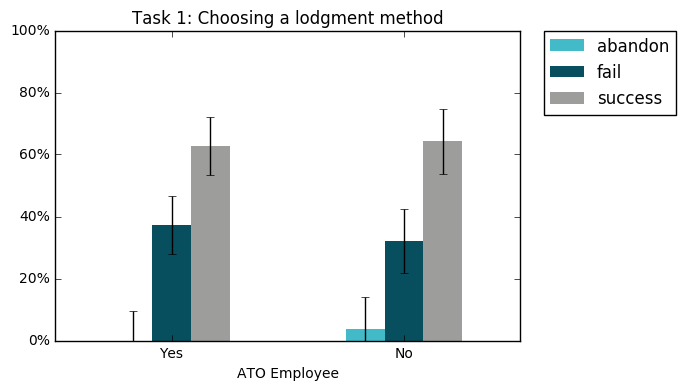

In [10]:
breakdown_task_rates(clean_df, cols[13], cols[35], ['ATO Employee','Test Result'], 
                     'Task 1: Choosing a lodgment method', ['Abandon','Fail','Success'], folder) #

#### Q: "I found it easy to find the right lodgment method."

* "I found it easy to find the right lodgment method." (N)  \
ATO Employee Likert rating                                                                            
Yes          Neither agree nor disagree                                                 25            
             Disagree                                                                   19            
             Agree                                                                      58            
No           Neither agree nor disagree                                                 18            
             Disagree                                                                   23            
             Agree                                                                      40            

                                         * "I found it easy to find the right lodgment method." (%)  
ATO Employee Likert rating                                                                           
Yes          Neither agree nor disagree                                           0.245098           
             Disagree                                                             0.186275           
             Agree                                                                0.568627           
No           Neither agree nor disagree                                           0.222222           
             Disagree                                                             0.283951           
             Agree                                                                0.493827

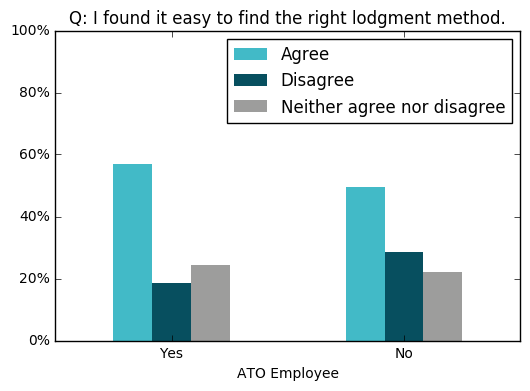

In [8]:
beta.breakdown_likert_rates(clean_df, cols[19], cols[35], ['ATO Employee','Likert rating'], 
                     'Q: I found it easy to find the right lodgment method.', 
                     ['Agree','Disagree','Neither agree nor disagree'], folder)

#### Q: "I feel confident acting on the information on the website."

* "I feel confident acting on the information on the website." (N)  \
ATO Employee Likert rating                                                                                    
Yes          Neither agree nor disagree                                                 17                    
             Disagree                                                                   12                    
             Agree                                                                      73                    
No           Neither agree nor disagree                                                 24                    
             Disagree                                                                   15                    
             Agree                                                                      42                    

                                         * "I feel confident acting on the information on the website." (%)  
ATO Employee Likert rating                                                                                   
Yes          Neither agree nor disagree                                           0.166667                   
             Disagree                                                             0.117647                   
             Agree                                                                0.715686                   
No           Neither agree nor disagree                                           0.296296                   
             Disagree                                                             0.185185                   
             Agree                                                                0.518519

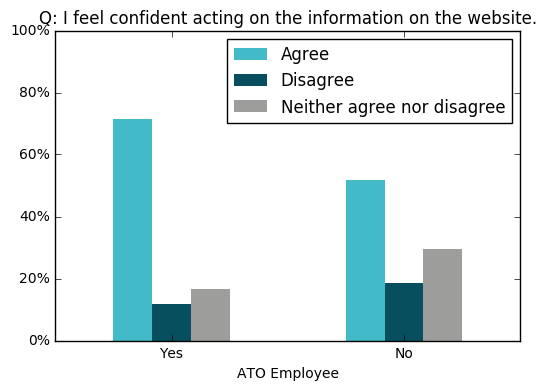

In [9]:
beta.breakdown_likert_rates(clean_df, cols[20], cols[35], ['ATO Employee','Likert rating'], 
                     'Q: I feel confident acting on the information on the website.', 
                     ['Agree','Disagree','Neither agree nor disagree'], folder)

#### Q: "I found the content easy to read and understand."

* "I found the content easy to read and understand." (N)  \
ATO Employee Likert rating                                                                          
Yes          Neither agree nor disagree                                                 14          
             Disagree                                                                    4          
             Agree                                                                      84          
No           Neither agree nor disagree                                                 24          
             Disagree                                                                    9          
             Agree                                                                      48          

                                         * "I found the content easy to read and understand." (%)  
ATO Employee Likert rating                                                                         
Yes          Neither agree nor disagree                                           0.137255         
             Disagree                                                             0.039216         
             Agree                                                                0.823529         
No           Neither agree nor disagree                                           0.296296         
             Disagree                                                             0.111111         
             Agree                                                                0.592593

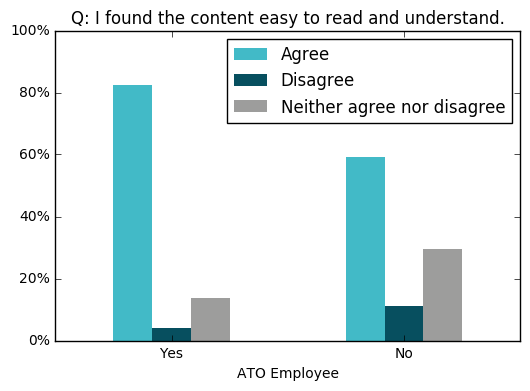

In [10]:
beta.breakdown_likert_rates(clean_df, cols[21], cols[35], ['ATO Employee','Likert rating'], 
                     'Q: I found the content easy to read and understand.', 
                     ['Agree','Disagree','Neither agree nor disagree'], folder)

#### Q: "Which lodgment method did you choose?"

* Which lodgment method did you choose? (N)  \
ATO Employee Likert rating                                                          
Yes          myTax                                                             67   
             Tax agent                                                         28   
             Submit a paper lodgment                                            2   
             I'd rather not say                                                 2   
No           myTax                                                             47   
             Tax agent                                                         27   
             I'd rather not say                                                 1   

                                      * Which lodgment method did you choose? (%)  
ATO Employee Likert rating                                                         
Yes          myTax                                                       0.676768  
             Tax agent                                                   0.282828  
             Submit a paper lodgment                                     0.020202  
             I'd rather not say                                          0.020202  
No           myTax                                                       0.626667  
             Tax agent                                                   0.360000  
             I'd rather not say                                          0.013333

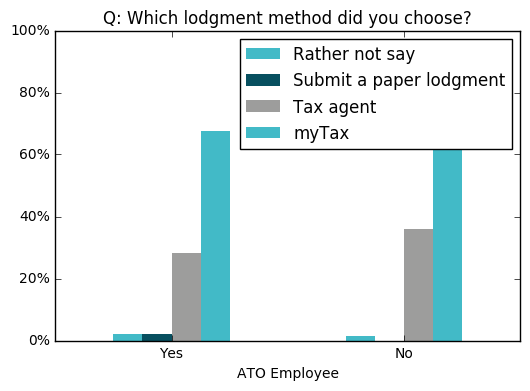

In [11]:
beta.breakdown_likert_rates(clean_df, cols[22], cols[35], ['ATO Employee','Likert rating'], 
                     'Q: Which lodgment method did you choose?', 
                     ['Rather not say','Submit a paper lodgment', 'Tax agent' , 'myTax'], folder)

### Task 2: Finding info on next steps

#### Completion rates

['Yes' 'No']


Task 2: Finding info on next steps (N)  \
ATO Employee Test Result                                           
Yes          success                                          42   
             fail                                             59   
             abandon                                           1   
No           success                                          40   
             fail                                             40   
             abandon                                           1   

                          Task 2: Finding info on next steps (%)  
ATO Employee Test Result                                          
Yes          success                                    0.411765  
             fail                                       0.578431  
             abandon                                    0.009804  
No           success                                    0.493827  
             fail                                       0.493827  
             abandon                                    0.012346

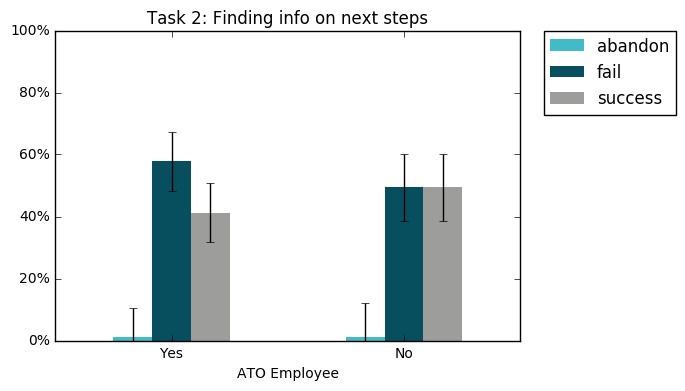

In [12]:
beta.breakdown_task_rates(clean_df, cols[16], cols[35], ['ATO Employee','Test Result'], 
                               'Task 2: Finding info on next steps', ['Abandon','Fail','Success'], folder)

#### Q: "Based on the information I found I would know what to do to submit my tax return."

* "Based on the information I found I would know what to do to submit my tax return." (N)  \
ATO Employee Likert rating                                                                                                           
Yes          Neither agree nor disagree                                                  8                                           
             Disagree                                                                    6                                           
             Agree                                                                      88                                           
No           Neither agree nor disagree                                                 13                                           
             Disagree                                                                    7                                           
             Agree                                                                      61                                           

                                         * "Based on the information I found I would know what to do to submit my tax return." (%)  
ATO Employee Likert rating                                                                                                          
Yes          Neither agree nor disagree                                           0.078431                                          
             Disagree                                                             0.058824                                          
             Agree                                                                0.862745                                          
No           Neither agree nor disagree                                           0.160494                                          
             Disagree                                                             0.086420                                          
             Agree                                                                0.753086

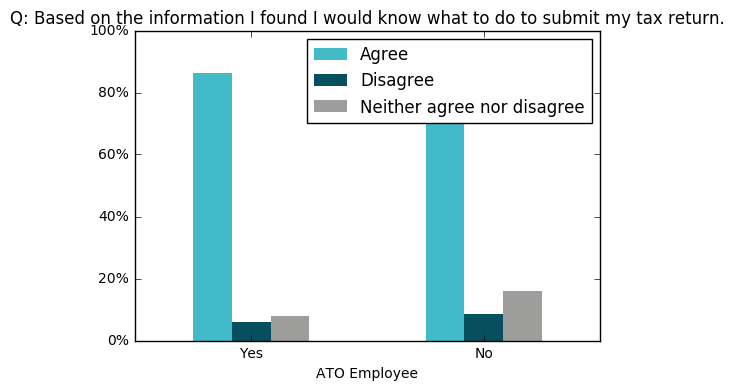

In [13]:
beta.breakdown_likert_rates(clean_df, cols[26], cols[35], ['ATO Employee','Likert rating'], 
                     'Q: Based on the information I found I would know what to do to submit my tax return.', 
                     ['Agree','Disagree','Neither agree nor disagree'], folder)

#### Q: Based on this task, what would be the best method to lodge online?

Based on this task, what would be the best method to lodge online? (N)  \
ATO Employee Likert rating                                                                           
Yes          myTax                                                        100                        
No           myTax                                                         74                        
             Tax agent                                                      5                        

                            Based on this task, what would be the best method to lodge online? (%)  
ATO Employee Likert rating                                                                          
Yes          myTax                                                   1.000000                       
No           myTax                                                   0.936709                       
             Tax agent                                               0.063291

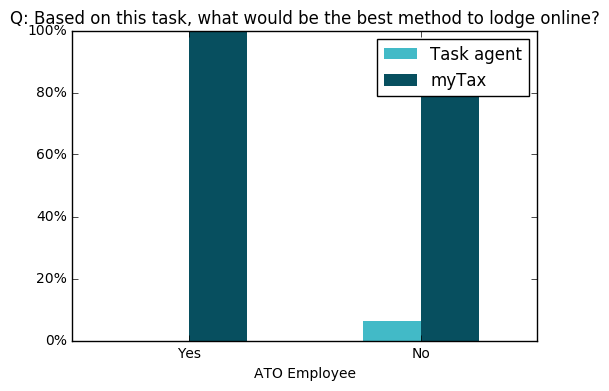

In [14]:
beta.breakdown_likert_rates(clean_df, cols[27], cols[35], ['ATO Employee','Likert rating'], 
                     'Q: Based on this task, what would be the best method to lodge online?', 
                     ['Task agent','myTax'], folder)

### Post survey

#### Q: How satisfied did you feel using this website?

How satisfied did you feel using this website? (N)  \
ATO Employee Likert rating                                                                            
Yes          Satisfied                                                                          80    
             Neither satisfied nor dissatisfied                                                 16    
             Dissatisfied                                                                        6    
No           Satisfied                                                                          45    
             Neither satisfied nor dissatisfied                                                 22    
             Dissatisfied                                                                       13    

                                                 How satisfied did you feel using this website? (%)  
ATO Employee Likert rating                                                                           
Yes          Satisfied                                                                    0.784314   
             Neither satisfied nor dissatisfied                                           0.156863   
             Dissatisfied                                                                 0.058824   
No           Satisfied                                                                    0.562500   
             Neither satisfied nor dissatisfied                                           0.275000   
             Dissatisfied                                                                 0.162500

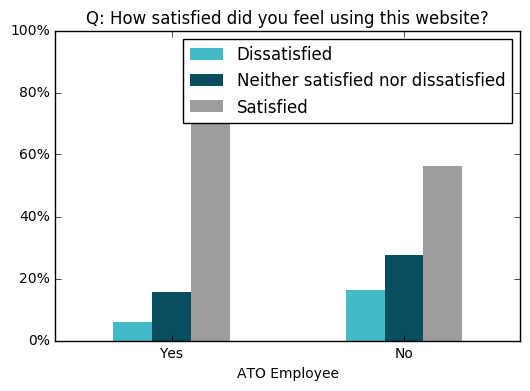

In [15]:
beta.breakdown_likert_rates(clean_df, cols[29], cols[35], ['ATO Employee','Likert rating'], 
                     'Q: How satisfied did you feel using this website?', 
                     ['Dissatisfied','Neither satisfied nor dissatisfied','Satisfied'], folder)

#### Q: "I trust the information on the website."

I trust the information on the website. (N)  \
ATO Employee Likert rating                                                             
Yes          Neither agree nor disagree                                           11   
             Disagree                                                              1   
             Agree                                                                89   
No           Neither agree nor disagree                                           17   
             Disagree                                                              5   
             Agree                                                                59   

                                         I trust the information on the website. (%)  
ATO Employee Likert rating                                                            
Yes          Neither agree nor disagree                                     0.108911  
             Disagree                                                       0.009901  
             Agree                                                          0.881188  
No           Neither agree nor disagree                                     0.209877  
             Disagree                                                       0.061728  
             Agree                                                          0.728395

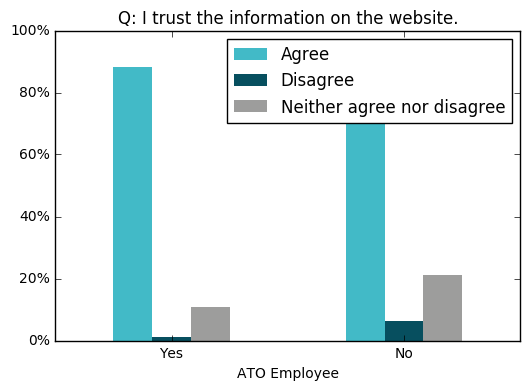

In [16]:
beta.breakdown_likert_rates(clean_df, cols[30], cols[35], ['ATO Employee','Likert rating'], 
                     'Q: I trust the information on the website.', 
                     ['Agree','Disagree','Neither agree nor disagree'], folder)

#### Q: I would use this section of the ato.gov.au website in the future. 

I would use this section of the ato.gov.au website in the future. (N)  \
ATO Employee Likert rating                                                                                       
Yes          Neither agree nor disagree                                                 18                       
             Disagree                                                                    4                       
             Agree                                                                      79                       
No           Neither agree nor disagree                                                 19                       
             Disagree                                                                   14                       
             Agree                                                                      48                       

                                         I would use this section of the ato.gov.au website in the future. (%)  
ATO Employee Likert rating                                                                                      
Yes          Neither agree nor disagree                                           0.178218                      
             Disagree                                                             0.039604                      
             Agree                                                                0.782178                      
No           Neither agree nor disagree                                           0.234568                      
             Disagree                                                             0.172840                      
             Agree                                                                0.592593

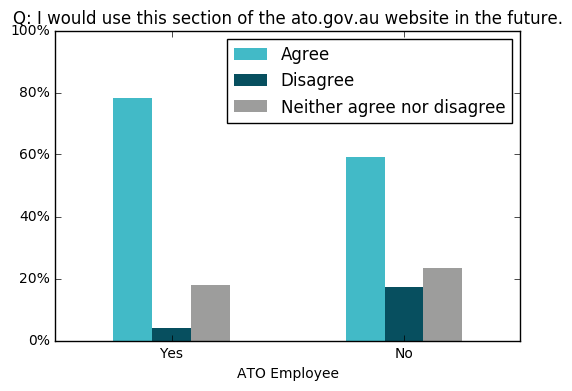

In [17]:
beta.breakdown_likert_rates(clean_df, cols[31], cols[35], ['ATO Employee','Likert rating'], 
                     'Q: I would use this section of the ato.gov.au website in the future.', 
                     ['Agree','Disagree','Neither agree nor disagree'], folder)

#### Q: I found it easy to find the information I was looking for.

I found it easy to find the information I was looking for. (N)  \
ATO Employee Likert rating                                                                                
Yes          Neither agree nor disagree                                                 18                
             Disagree                                                                    9                
             Agree                                                                      73                
No           Neither agree nor disagree                                                 17                
             Disagree                                                                   16                
             Agree                                                                      47                

                                         I found it easy to find the information I was looking for. (%)  
ATO Employee Likert rating                                                                               
Yes          Neither agree nor disagree                                             0.1800               
             Disagree                                                               0.0900               
             Agree                                                                  0.7300               
No           Neither agree nor disagree                                             0.2125               
             Disagree                                                               0.2000               
             Agree                                                                  0.5875

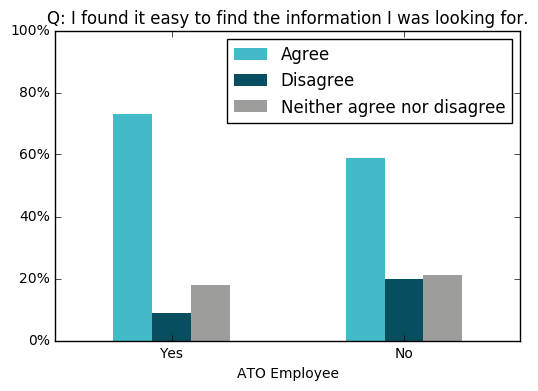

In [18]:
beta.breakdown_likert_rates(clean_df, cols[32], cols[35], ['ATO Employee','Likert rating'], 
                     'Q: I found it easy to find the information I was looking for.', 
                     ['Agree','Disagree','Neither agree nor disagree'], folder)

#### Q: The content and language was easy to understand.

The content and language was easy to understand. (N)  \
ATO Employee Likert rating                                                                      
Yes          Neither agree nor disagree                                                  8      
             Disagree                                                                    4      
             Agree                                                                      89      
No           Neither agree nor disagree                                                 17      
             Disagree                                                                    7      
             Agree                                                                      56      

                                         The content and language was easy to understand. (%)  
ATO Employee Likert rating                                                                     
Yes          Neither agree nor disagree                                           0.079208     
             Disagree                                                             0.039604     
             Agree                                                                0.881188     
No           Neither agree nor disagree                                           0.212500     
             Disagree                                                             0.087500     
             Agree                                                                0.700000

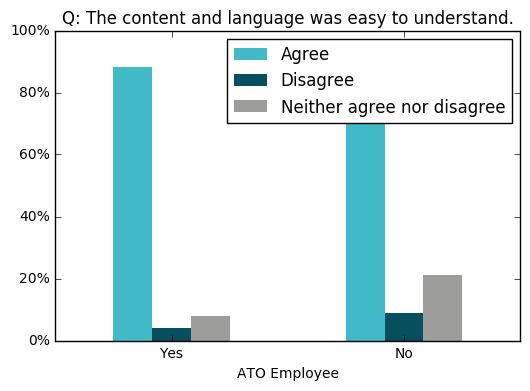

In [19]:
beta.breakdown_likert_rates(clean_df, cols[33], cols[35], ['ATO Employee','Likert rating'], 
                     'Q: The content and language was easy to understand.', 
                     ['Agree','Disagree','Neither agree nor disagree'], folder)